#**Project Title : Resume Screening**

##**Problem Statement:**

In the competitive job market, companies are inundated with a massive influx of resumes for each job opening, necessitating an efficient and effective method for talent acquisition. The challenge is particularly pronounced for labor-intensive businesses experiencing growth and high attrition rates. The IT industry, amid rapid expansion, faces a shortage of skilled professionals. To address the daunting task of selecting the most suitable candidates from a plethora of resumes, companies turn to machine learning algorithms for automated Resume Screening. Large organizations, constrained by time, seek innovative solutions to sift through resumes swiftly, leveraging technology to identify and prioritize candidates with the requisite technical skills and business domain expertise. This process aims to streamline the hiring workflow, ensuring that companies secure the right talent for their projects and customer needs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from gensim import corpora, models
from sumy.nlp.tokenizers import Tokenizer
from sklearn.metrics import accuracy_score, classification_report
import gensim
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Interview question solved /Machine learning /Machine Learning /Unsupervised learning/NLP and Topic Modelling/NLP Project/Dataset/UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
print(len(df['Category'].value_counts()))
print('\n')
print(df['Category'].value_counts())

25


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [ ]:
df['Resume'].value_counts()

Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ Renovated complete UI to make it more modern, user-friendly, maintaina

##visualize the number of categories

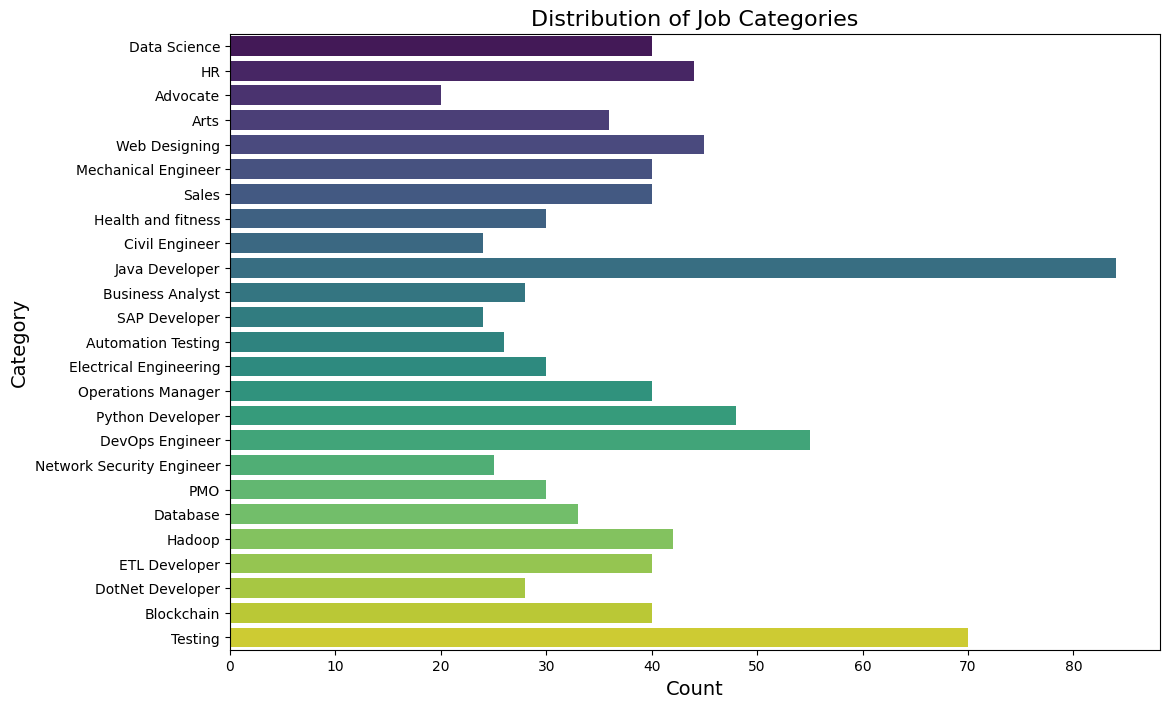

In [ ]:
#plot of Category
# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))
sns.countplot(y="Category", data=df, palette="viridis")
plt.title('Distribution of Job Categories', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

##visualize the distribution of categories

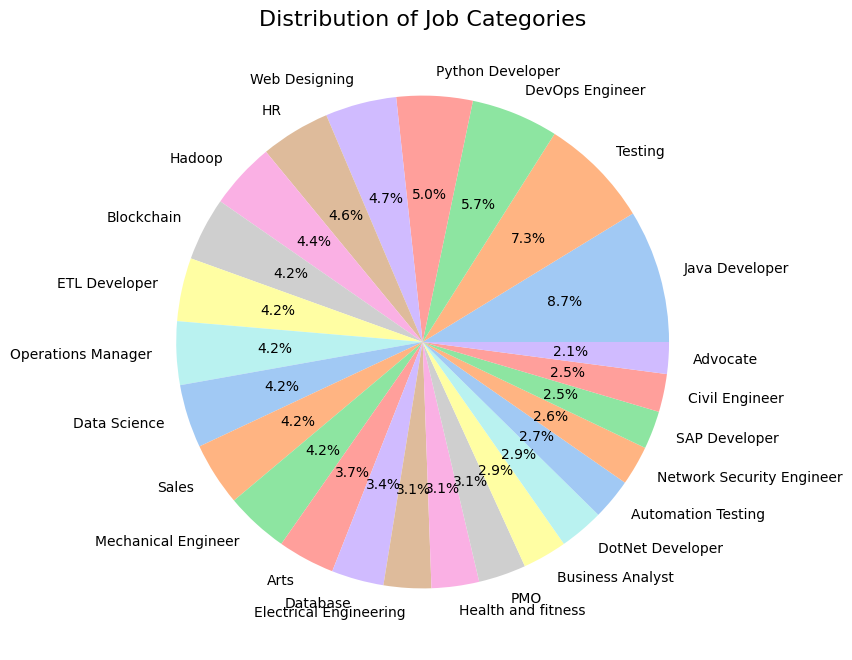

In [ ]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(12, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Job Categories', fontsize=16)
plt.show()

In [ ]:
def cleanResume(resumeText):
    # Remove URLs
    resumeText = re.sub('http\S+\s*', ' ', resumeText)

    # Remove RT and cc
    resumeText = re.sub('RT|cc', ' ', resumeText)

    # Remove hashtags
    resumeText = re.sub('#\S+', '', resumeText)

    # Remove mentions
    resumeText = re.sub('@\S+', ' ', resumeText)

    # Remove punctuations
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)

    # Remove non-ASCII characters
    resumeText = re.sub(r'[^\x00-\x7f]', ' ', resumeText)

    # Remove extra whitespaces
    resumeText = re.sub('\s+', ' ', resumeText).strip()  # Strip leading/trailing whitespaces

    return resumeText

df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


##Wordcloud represents the most numbers of words larger

In [ ]:
text=' '.join(df['cleaned_resume'])

In [ ]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

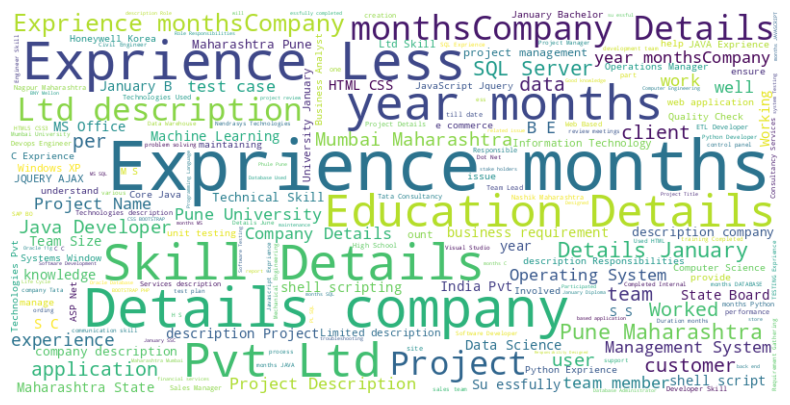

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Text preprocessing

In [ ]:
# Function for text preprocessing
def preprocess_text(text):
    # Remove special characters and digits using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
# Apply text preprocessing to the 'cleaned_resume' column
df['processed_resume'] = df['cleaned_resume'].apply(preprocess_text)

In [ ]:
# Feature extraction using Bag of Words (BoW)
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
bow_features = vectorizer.fit_transform(df['processed_resume']).toarray()

In [ ]:
# Feature extraction using Word2Vec
sentences = [nltk.word_tokenize(sentence) for sentence in df['processed_resume']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

##Train Machine learning model

In [ ]:
pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.3 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21691 sha256=013e0a00ef65886892b80c6d917f03be26223aef997ba2ade3e6405917aaab5f
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=dd75be1d3c804d00a8fc3130cc23a82706597543b861685941bdd48f8ccceda8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [ ]:
X = df['processed_resume']
y = df['Category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [ ]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##MultinomialNB

In [ ]:
# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

In [ ]:
# Train the classifier
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predictions on the testing set
y_pred = classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      0.40      0.57         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      0.92      0.96        12
                   Hadoop       1.00  

##GaussianNB

In [ ]:
# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

In [ ]:
# Train the classifier
classifier.fit(X_train_tfidf.toarray(), y_train)

GaussianNB()

In [ ]:
# Predictions on the testing set
y_pred = classifier.predict(X_test_tfidf.toarray())

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  

##**Conclusion:**

1. **MultinomialNB:**
   - **Accuracy:** 96%
   - **Highlights:**
     - High precision and recall for most classes.
     - Some classes with lower recall may benefit from further model optimization.
   - **Recommendation:**
     - Overall, the model performs well, but there is room for improvement in certain classes with lower recall.

2. **GaussianNB:**
   - **Accuracy:** 99%
   - **Highlights:**
     - Exceptional performance with high precision, recall, and F1-score for all classes.
     - Robust handling of the dataset, showcasing consistent results across diverse job categories.
   - **Recommendation:**
     - The GaussianNB model demonstrates outstanding overall performance, making it a preferable choice for resume screening in this context.

**Comparison:**
- Both models exhibit commendable accuracy, but GaussianNB stands out with near-perfect results.
- GaussianNB is well-suited for scenarios where data distribution assumptions of the MultinomialNB may not hold.
- Further analysis should focus on refining the MultinomialNB model to enhance its performance on specific job categories with lower recall.

In summary, while MultinomialNB performs reasonably well, GaussianNB emerges as the superior choice for the resume screening task in this context, showcasing exceptional accuracy and robustness across diverse job categories.